## Simulation for biallelic dynamics of SCN1A

In [1]:
# The following section only needs to be executed when running off of google drive

# from google.colab import drive
# drive.mount('/content/drive')

# This needs to be run only once at the beginning to access the models
#-------------------------------------------------------------------------------
!pip install --upgrade git+https://github.com/roschkoenig/SodMod.git


  Cloning https://github.com/roschkoenig/SodMod.git to /tmp/pip-req-build-i8rpthyd
  Running command git clone -q https://github.com/roschkoenig/SodMod.git /tmp/pip-req-build-i8rpthyd
  Created wheel for sodmod: filename=sodmod-0.1-cp36-none-any.whl size=9021 sha256=f825d7f0e6efbebebfb3888650b4691a73f5d816937e2c24287248abce914e3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-03kk9pm8/wheels/07/ed/a1/0bc1410b394766c57f600844bcb0d8e79e024d8e5633a74295
Successfully built sodmod


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from scipy.integrate import odeint
import tensorflow as tf
from torch import multiprocessing as mp
from itertools import repeat

import sodmod as sm
from sodmod import params as pr
from sodmod import cells as cl

In [0]:
# Manual definitions
#===============================================================================
# Simulations
#-------------------------------------------------------------------------------
V0         = -80
steps      = 10
ctyp       = 'IN'                        # Cell type to be used 'IN', 'PY', 'RE'
conds      = ['WT37', 'AS37', 'TI37']    # Conditions to be modelled
doparallel = False                      # Run simulations in parallel 

# Plotting 
#-------------------------------------------------------------------------------
ptype     = 'phase'                     # 'time', 'phase', 'bifurcation'   

In [29]:
# Solve ODE system
#===============================================================================
# Initial conditions
#-------------------------------------------------------------------------------
np.random.seed(1000)
T  = np.linspace(0,150,10000)

# Define conditions to be tested
#-------------------------------------------------------------------------------
cols  = ['k', 'b', 'r']                       # Colours for plotting 
I_scl = np.exp(np.arange(-2,6,6/steps))      # Input currents to be modelled

# Run simulations
#===============================================================================
def runsim(i_scl, conds, cell, V0, Y0 = None):

  from sodmod import params as pr
  Vy    = {}

  # Run simulation across conditions
  #-------------------------------------------------------------------------------  
  for ci in range(len(conds)):
    par       = pr.params(conds[ci], i_scl, ctyp, paradigm='constant')
    if Y0 == None:  
      y0    = np.random.rand(len(par['snames']))
      y0[0] = V0
    else:           y0 = Y0[conds[ci]][-1,:]
    Vy.update({conds[ci]:odeint(cell, y0, T, args=(par,))})

  return Vy

# Parallel execution (CPU based)
#-------------------------------------------------------------------------------
if doparallel:
  cell   = getattr(cl, ctyp)
  p      = mp.Pool(len(I_scl))
  Vy     = p.starmap(runsim, zip(I_scl, repeat(conds), repeat(cell), repeat(V0)))

# Looped execution
#-------------------------------------------------------------------------------
else: 
  print('Running forward simulation')
  Vy_fwd = []
  I_fwd  = []
  for i in I_scl:
    if len(Vy_fwd) == 0:  Vy_fwd.append(runsim(i, conds, cell, V0))
    else:                 Vy_fwd.append(runsim(i, conds, cell, V0, Vy_fwd[-1]))
    I_fwd.append(i)
  
  print('Running backward simulation')
  Vy_bwd = []
  I_bwd  = []
  for i in np.flip(I_scl):
    if len(Vy_bwd) == 0:  Vy_bwd.append(runsim(i, conds, cell, V0))
    else:                 Vy_bwd.append(runsim(i, conds, cell, V0, Vy_bwd[-1]))
    I_bwd.append(i)  
  


Running forward simulation


/usr/local/lib/python3.6/dist-packages/sodmod/chans.py:12: RuntimeWarning: invalid value encountered in double_scalars
  alpha_m  = (-0.32*(Vm-p['Vt']-13.0)) / (np.exp(-(Vm-p['Vt']-13.0)/4)-1)
/usr/local/lib/python3.6/dist-packages/sodmod/chans.py:13: RuntimeWarning: invalid value encountered in double_scalars
  beta_m   = (0.28*(Vm-p['Vt']-40.0)) / (np.exp((Vm-p['Vt']-40.0)/5)-1)


Running backward simulation


/usr/local/lib/python3.6/dist-packages/sodmod/chans.py:12: RuntimeWarning: invalid value encountered in double_scalars
  alpha_m  = (-0.32*(Vm-p['Vt']-13.0)) / (np.exp(-(Vm-p['Vt']-13.0)/4)-1)
/usr/local/lib/python3.6/dist-packages/sodmod/chans.py:13: RuntimeWarning: invalid value encountered in double_scalars
  beta_m   = (0.28*(Vm-p['Vt']-40.0)) / (np.exp((Vm-p['Vt']-40.0)/5)-1)


[[-17.67238459]
 [-17.67238459]]
[[-24.49055589]
 [-24.49055589]]
[[-27.84727856]
 [-27.6538466 ]]
[[-53.05148073]
 [ 10.22120471]]
[[-62.39948656]
 [ 29.8505008 ]]
[[-67.8733158]
 [ 41.4793705]]
[[-71.33085573]
 [ 47.39235382]]
[[-73.57558601]
 [ 49.84694876]]
[[-74.96213589]
 [ 50.50427214]]
[[-75.74900968]
 [ 50.4768659 ]]
[[-69.29133636]
 [-53.758464  ]]
[[-64.33719547]
 [-63.98819499]]
[[-66.88852309]
 [-66.79784049]]
[[-68.14033125]
 [-68.09948177]]
[[-16.77414142]
 [-16.77414142]]
[[-22.38653664]
 [-22.38653664]]
[[-45.13355339]
 [  5.85115569]]
[[-55.92789167]
 [ 18.56419911]]
[[-63.54687009]
 [ 31.9419232 ]]
[[-68.64851841]
 [ 41.42638054]]
[[-72.04089703]
 [ 46.53994709]]
[[-74.28259675]
 [ 48.52666065]]
[[-75.65388207]
 [ 48.78740734]]
[[-76.43290631]
 [ 48.49490424]]
[[-60.77514809]
 [-60.28584342]]
[[-65.10707231]
 [-64.98744379]]
[[-67.24662694]
 [-67.19028423]]
[[-68.3935908 ]
 [-68.36425438]]
[[-17.52364556]
 [-17.52364556]]
[[-24.29237878]
 [-24.29237878]]
[[-27.998336

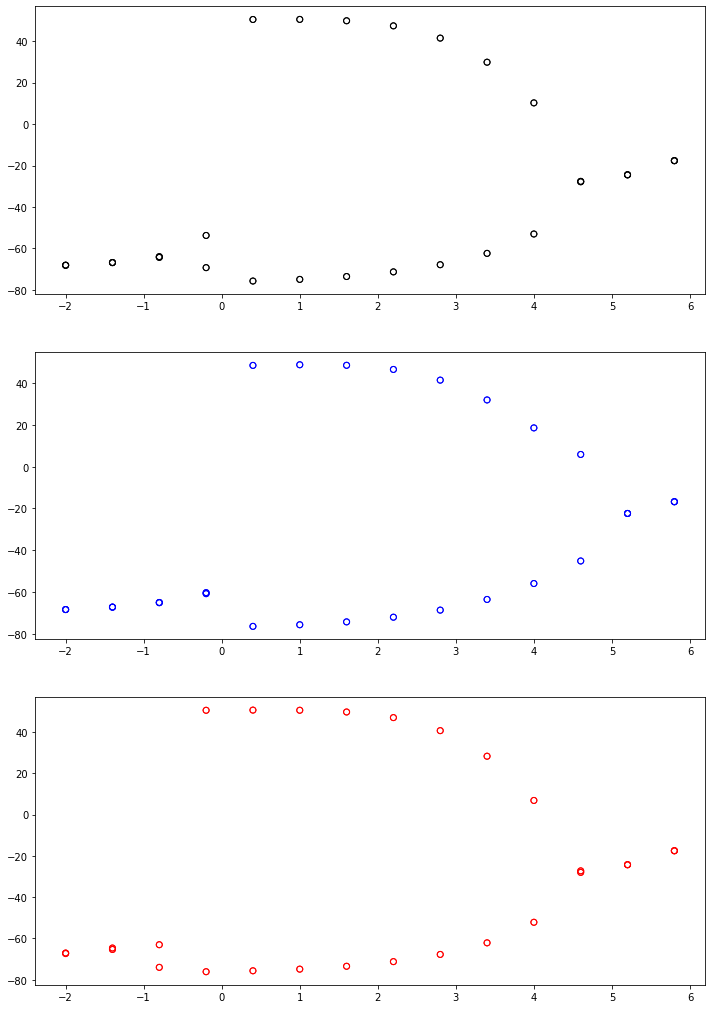

In [40]:
#===============================================================================
# Time series plots
#===============================================================================
def plot_timeseries(Vy, I_scl, ctyp, Nplots = 0):

  if Nplots == 0: Nplots = len(Vy)
  conds = list(Vy[0].keys())

  # Set up plot
  #--------------------------------------------------------------------
  fig, ax = plt.subplots(Nplots,1, figsize=(12, Nplots*6))
  plotid  = 0

  for i in range(0,len(Vy),round(len(Vy)/Nplots)):
    
    for ci in range(len(conds)):
      cond = conds[ci]
      V    = Vy[i][cond][:,0]

      # Do the plotting
      #------------------------------------------------------------
      ax[plotid].plot(T, V-ci*100, cols[ci], label = conds[ci]) 
      ax[plotid].set_title("Input current " + str(I_scl[i]))
      ax[plotid].legend()

    plotid = plotid + 1

#===============================================================================
# Phase space plots
#===============================================================================
def plot_phasespace(Vy, I_scl, ctyp, states = ['Vm', 'm_Na'], Nplots = 0):

  if Nplots == 0: Nplots = len(Vy)
  conds = list(Vy[0].keys())
  
  # Set up plot
  #--------------------------------------------------------------------
  fig, ax = plt.subplots(1,len(conds), figsize=(12*len(conds), 12))
  testpar = pr.params(typ = ctyp)

  for ci in range(len(conds)):
    if ci == 0: cmap = plt.get_cmap('Greys')
    if ci == 1: cmap = plt.get_cmap('Blues')
    if ci == 2: cmap = plt.get_cmap('Reds')
    cmap = cmap(np.linspace(0,1,Nplots))

    for i in range(0,len(Vy),round(len(Vy)/Nplots)):

      cond = conds[ci]
      s0   = Vy[i][cond][3000:7000,testpar["snames"].index(states[0])]
      s1   = Vy[i][cond][3000:7000,testpar["snames"].index(states[1])]

      # Do the plotting
      #------------------------------------------------------------
      ax[ci].plot(s0, s1, cols[ci], color=cmap[i,:]) 
      ax[ci].set_title(cond + "Input current " + str(I_scl[i]))
  
#===============================================================================
# Bifurcation plots
#===============================================================================
def plot_bifurcation(Vy_fwd, Vy_bwd, I_fwd, I_bwd, ctyp, Nplots = None):
  if Nplots == None: Nplots = len(Vy_fwd)
  conds  = list(Vy_fwd[0].keys())

  # Set up plot
  #--------------------------------------------------------------------
  fig, ax = plt.subplots(len(conds),1, figsize=(12,6*len(conds)))
  testpar = pr.params(typ = ctyp)

  plotid = 0
  for ci in range(len(conds)):

    
    for i in range(0,len(Vy_fwd),round(len(Vy_fwd)/Nplots)):

      cond = conds[ci]
      f    = np.zeros([2,1])
      b    = np.zeros([2,1])
      i_fwd    = np.multiply([1,1],np.log(I_fwd[i]))
      i_bwd    = np.multiply([1,1],np.log(I_bwd[i]))  
      
      f[0] = np.min(Vy_fwd[i][cond][4000:6000,0])
      f[1] = np.max(Vy_fwd[i][cond][4000:6000,0])

      b[0] = np.min(Vy_bwd[i][cond][4000:6000,0])
      b[1] = np.max(Vy_bwd[i][cond][4000:6000,0])

      # Do the plotting
      #------------------------------------------------------------
      print(b)
      ax[plotid].scatter(i_fwd, f, color=cols[ci], facecolor='none')
      ax[plotid].scatter(i_bwd, b, color=cols[ci], facecolor='none') 

    plotid = plotid + 1


plot_bifurcation(Vy_fwd, Vy_bwd, I_fwd, I_bwd, ctyp)





In [37]:
Vy_bwd

[{'AS37': array([[-8.00000000e+01,  9.82027485e-01,  3.39637684e-01,
           7.06687194e-01,  3.61877068e-01],
         [-7.94133942e+01,  9.67811808e-01,  2.68261433e-01,
           7.10305465e-01,  3.53429095e-01],
         [-7.97479381e+01,  9.53822365e-01,  2.12044065e-01,
           7.13867676e-01,  3.45188270e-01],
         ...,
         [-6.98512730e+01,  1.15957320e-02,  8.06618480e-03,
           9.99866671e-01,  8.06053328e-03],
         [-6.98511597e+01,  1.15960017e-02,  8.06629976e-03,
           9.99866666e-01,  8.06065630e-03],
         [-6.98510466e+01,  1.15962709e-02,  8.06641456e-03,
           9.99866661e-01,  8.06077915e-03]]),
  'TI37': array([[-8.00000000e+01,  8.55058253e-01,  6.57253508e-01,
           7.65682994e-01,  5.54087238e-01],
         [-6.62464139e+01,  8.44736049e-01,  5.37249099e-01,
           7.67635118e-01,  5.43044867e-01],
         [-6.00753708e+01,  8.36740171e-01,  4.60041479e-01,
           7.68729869e-01,  5.34616698e-01],
         ...,


In [28]:
Vy.shape

AttributeError: ignored

In [7]:
I    = np.multiply([1,1],np.log(I_scl[1]))
I

array([-5.94, -5.94])

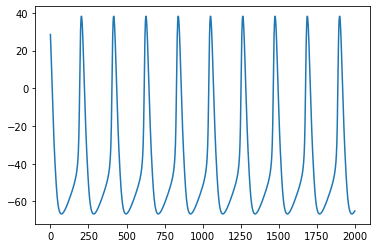

In [57]:
plt.plot(Vy[50][cond][4000:6000,0])